In [61]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Baca dataset
data = pd.read_csv('DataPenjualan.csv')

In [50]:
# Pisahkan fitur (X) dan target (y)
X = data[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']]
y = data['bahan_pokok']

In [51]:
# Label Encoding untuk kolom target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [52]:
# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [54]:
# Inisialisasi model XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

In [55]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [56]:
# Inisialisasi Grid Search dengan KFold
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=KFold(5), scoring='neg_mean_squared_error', n_jobs=-1)


In [57]:
# Latih model menggunakan Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    i...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Mean Squared Error: 6.07589941701037
Coefficient of Determination (R^2): 0.09231990416613367


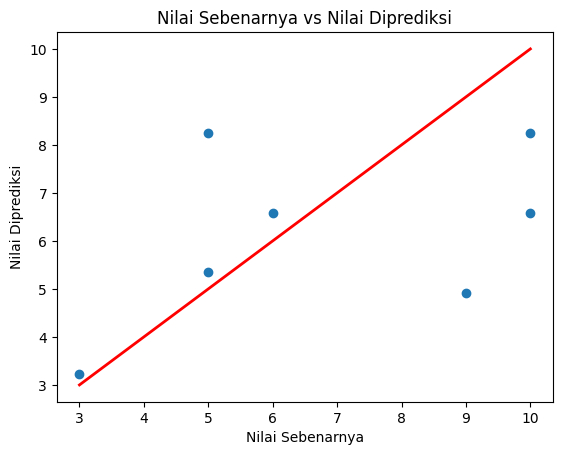

In [58]:
# Cek hasil Grid Search
if hasattr(grid_search, 'best_estimator_'):
    # Output hasil terbaik dari Grid Search
    best_model = grid_search.best_estimator_
    print('Best Model:', best_model)

    # Lakukan prediksi menggunakan model terbaik
    y_pred = best_model.predict(X_test)

    # Evaluasi model terbaik
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Mean Squared Error:', mse)
    print('Coefficient of Determination (R^2):', r2)

    # Visualisasi hasil prediksi
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=2)  # Garis 45 derajat
    plt.xlabel('Nilai Sebenarnya')
    plt.ylabel('Nilai Diprediksi')
    plt.title('Nilai Sebenarnya vs Nilai Diprediksi')
    plt.show()
else:
    print('Grid Search tidak berhasil menemukan model terbaik.')

In [98]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression

In [99]:
# Inisialisasi dictionary untuk menyimpan model
models = {}

In [111]:
# Lakukan training model untuk setiap bahan_pokok dengan K-Fold Cross-Validation atau LOOCV
for bahan_pokok in data['bahan_pokok'].unique():
    # Filter data untuk bahan_pokok tertentu
    data_bahan = data[data['bahan_pokok'] == bahan_pokok]
    
    # Pisahkan fitur (X) dan target (y)
    X = data_bahan[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']]
    y = data_bahan['januari']  # Harga akan diprediksi
    
    # Periksa jumlah sampel
    n_samples = X.shape[0]
    
    if n_samples < 2:
        print(f'Tidak cukup sampel untuk bahan_pokok: {bahan_pokok}. Lewati.')
        continue
    
    # Tentukan metode cross-validation yang sesuai
    if n_samples < 5:
        kf = LeaveOneOut()
    else:
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Inisialisasi model regresi linear
    model = LinearRegression()
    
    # Evaluasi model menggunakan K-Fold Cross-Validation atau LOOCV
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()
    print(f'Mean MSE for {bahan_pokok}: {mean_score}')
    
    # Latih model pada seluruh data untuk bahan_pokok ini
    model.fit(X, y)
    
    # Simpan model dalam dictionary
    models[bahan_pokok] = model

Mean MSE for Beras: 20957468158.2697
Mean MSE for Kedelai: 3135856.121614386
Mean MSE for Gula: 564807.7894205274
Mean MSE for Minyak Goreng: 2707530.3894216996
Mean MSE for Tepung Terigu: 2546296.296296295
Mean MSE for Daging Sapi: 40710761.16558146
Mean MSE for Daging Ayam Ras: 1000000.0
Mean MSE for Telur Ayam Ras: 3516206.60281189
Mean MSE for Ikan Bandeng: 4105017.194086079
Mean MSE for Ikan Kembung: 13992155.324962547
Tidak cukup sampel untuk bahan_pokok: Daging Ayam Broiler. Lewati.
Tidak cukup sampel untuk bahan_pokok: Ikan Tongkol. Lewati.


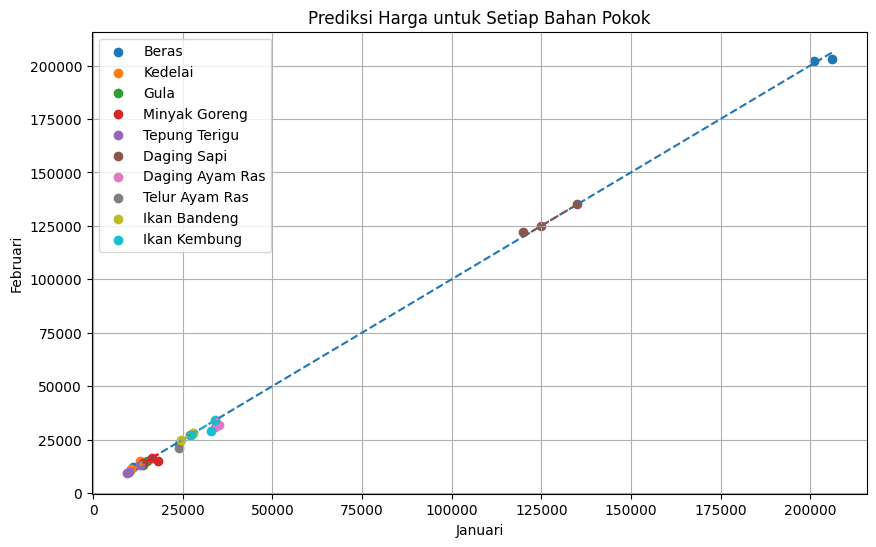

In [112]:
# Visualisasi prediksi harga untuk setiap bahan_pokok
plt.figure(figsize=(10, 6))
for bahan_pokok, model in models.items():
    # Filter data untuk bahan_pokok tertentu
    data_bahan = data[data['bahan_pokok'] == bahan_pokok]
    
    # Pisahkan fitur (X) untuk visualisasi
    X_vis = data_bahan[['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']]
    
    # Prediksi harga menggunakan model yang sesuai
    prediksi_harga = model.predict(X_vis)
    
    # Plot data aktual
    plt.scatter(data_bahan['januari'], data_bahan['februari'], label=bahan_pokok)
    
    # Plot prediksi harga
    plt.plot(data_bahan['januari'], prediksi_harga, linestyle='--')

plt.xlabel('Januari')
plt.ylabel('Februari')
plt.title('Prediksi Harga untuk Setiap Bahan Pokok')
plt.legend()
plt.grid(True)
plt.show()